In [1]:
%matplotlib inline

In [2]:
#using xarray for data read
import xarray as xa
import numpy as np

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean


/Volumes/WDC_internal/Users/bell/anaconda2/envs/py36/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


***If you are on a mac and use conda-forge and homebrew, cartopy will not work if you have gdal/geos installed via homebrew*** Oct 5 2017

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

In [4]:
#greater bering region
extent = [-180, -135, 45, 75]


## Compare timeseries of two SST retrieval algorithms at M8 (62.19N 174.689W - 185.311E)

In [ ]:
### HRES OI V2 vs GHRSST vs blended

In [32]:
#avhrr+amsr data is available for 2002-2011 from ncei
erddap_path="http://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst2AmsrAgg"

#gh1sst data - ROMS from JPL
erddap_path_ghsst="http://coastwatch.pfeg.noaa.gov/erddap/griddap/jplG1SST"

erddap_path_blended = "http://coastwatch.pfeg.noaa.gov/erddap/griddap/erdGRssta1day"

In [6]:
erdf = xa.open_dataset(erddap_path) 
sst_amsrpavhrr = erdf['sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.25,185.5))
err_amsrpavhrr = erdf['err'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62,62.2),longitude=slice(185.25,185.5))

In [34]:
thdf = xa.open_dataset(erddap_path_ghsst) 
sst_ghsst = thdf['SST'].sel(time=slice('2010-06-01','2010-09-20'),
                            latitude=slice(62.1875,62.195),longitude=slice(-174.69,-174.68))

In [44]:
bhdf = xa.open_dataset(erddap_path_blended) 
sst_bhsst = bhdf['analyzed_sst'].sel(time=slice('2010-06-01','2010-09-20'),
                                 latitude=slice(62.1,62.2),longitude=slice(-174.69,-174.68))

(0, 10)

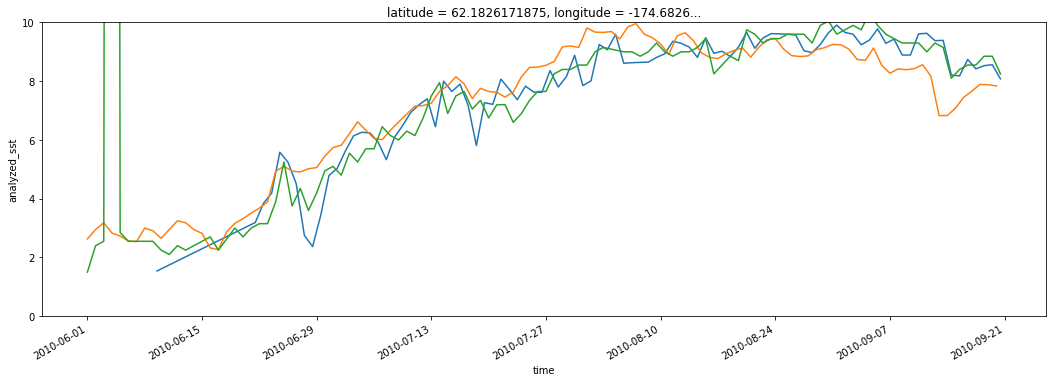

In [47]:
plt.figure(1, figsize=(18, 6), facecolor='w', edgecolor='w')
ax = plt.subplot(1,1,1)

sst_ghsst.plot() #blue
sst_amsrpavhrr.plot() #orange
sst_bhsst.plot() #

ax.set_ylim([0,10])